# Riesgo de incumplimiento crediticio de la vivienda

## Librerias

In [2]:
import pandas as pd
from herramientas import obtener_resumen_valores_unicos

import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [3]:
application_test = pd.read_csv('/home/bbchanchis/metadata/home_credit/data/application_test.csv')
application_train = pd.read_csv('/home/bbchanchis/metadata/home_credit/data/application_train.csv')
burea_balance = pd.read_csv('data/bureau_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
HomeCredit = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
installments_payment = pd.read_csv('data/installments_payments.csv')
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')

## Visualización de los df

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
obtener_resumen_valores_unicos(application_test)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,48744,48744,0
1,NAME_CONTRACT_TYPE,object,2,48744,0
2,CODE_GENDER,object,2,48744,0
3,FLAG_OWN_CAR,object,2,48744,0
4,FLAG_OWN_REALTY,object,2,48744,0
5,CNT_CHILDREN,int64,11,48744,0
6,AMT_INCOME_TOTAL,float64,606,48744,0
7,AMT_CREDIT,float64,2937,48744,0
8,AMT_ANNUITY,float64,7491,48720,24
9,AMT_GOODS_PRICE,float64,677,48744,0


In [6]:
obtener_resumen_valores_unicos(application_train)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,307511,307511,0
1,TARGET,int64,2,307511,0
2,NAME_CONTRACT_TYPE,object,2,307511,0
3,CODE_GENDER,object,3,307511,0
4,FLAG_OWN_CAR,object,2,307511,0
5,FLAG_OWN_REALTY,object,2,307511,0
6,CNT_CHILDREN,int64,15,307511,0
7,AMT_INCOME_TOTAL,float64,2548,307511,0
8,AMT_CREDIT,float64,5603,307511,0
9,AMT_ANNUITY,float64,13672,307499,12


In [7]:
obtener_resumen_valores_unicos(burea_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_BUREAU,int64,817395,27299925,0
1,MONTHS_BALANCE,int64,97,27299925,0
2,STATUS,object,8,27299925,0


In [8]:
obtener_resumen_valores_unicos(bureau)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,305811,1716428,0
1,SK_ID_BUREAU,int64,1716428,1716428,0
2,CREDIT_ACTIVE,object,4,1716428,0
3,CREDIT_CURRENCY,object,4,1716428,0
4,DAYS_CREDIT,int64,2923,1716428,0
5,CREDIT_DAY_OVERDUE,int64,942,1716428,0
6,DAYS_CREDIT_ENDDATE,float64,14096,1610875,105553
7,DAYS_ENDDATE_FACT,float64,2917,1082775,633653
8,AMT_CREDIT_MAX_OVERDUE,float64,68251,591940,1124488
9,CNT_CREDIT_PROLONG,int64,10,1716428,0


In [9]:
obtener_resumen_valores_unicos(credit_card_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,104307,3840312,0
1,SK_ID_CURR,int64,103558,3840312,0
2,MONTHS_BALANCE,int64,96,3840312,0
3,AMT_BALANCE,float64,1347904,3840312,0
4,AMT_CREDIT_LIMIT_ACTUAL,int64,181,3840312,0
5,AMT_DRAWINGS_ATM_CURRENT,float64,2267,3090496,749816
6,AMT_DRAWINGS_CURRENT,float64,187005,3840312,0
7,AMT_DRAWINGS_OTHER_CURRENT,float64,1832,3090496,749816
8,AMT_DRAWINGS_POS_CURRENT,float64,168748,3090496,749816
9,AMT_INST_MIN_REGULARITY,float64,312266,3535076,305236


In [10]:
obtener_resumen_valores_unicos(HomeCredit)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,Unnamed: 0,int64,219,219,0
1,Table,object,7,219,0
2,Row,object,196,219,0
3,Description,object,163,219,0
4,Special,object,7,86,133


In [11]:
obtener_resumen_valores_unicos(installments_payment)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,997752,13605401,0
1,SK_ID_CURR,int64,339587,13605401,0
2,NUM_INSTALMENT_VERSION,float64,65,13605401,0
3,NUM_INSTALMENT_NUMBER,int64,277,13605401,0
4,DAYS_INSTALMENT,float64,2922,13605401,0
5,DAYS_ENTRY_PAYMENT,float64,3039,13602496,2905
6,AMT_INSTALMENT,float64,902539,13605401,0
7,AMT_PAYMENT,float64,944235,13602496,2905


In [12]:
obtener_resumen_valores_unicos(pos_cash_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,936325,10001358,0
1,SK_ID_CURR,int64,337252,10001358,0
2,MONTHS_BALANCE,int64,96,10001358,0
3,CNT_INSTALMENT,float64,73,9975287,26071
4,CNT_INSTALMENT_FUTURE,float64,79,9975271,26087
5,NAME_CONTRACT_STATUS,object,9,10001358,0
6,SK_DPD,int64,3400,10001358,0
7,SK_DPD_DEF,int64,2307,10001358,0


In [13]:
obtener_resumen_valores_unicos(previous_application)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,1670214,1670214,0
1,SK_ID_CURR,int64,338857,1670214,0
2,NAME_CONTRACT_TYPE,object,4,1670214,0
3,AMT_ANNUITY,float64,357959,1297979,372235
4,AMT_APPLICATION,float64,93885,1670214,0
5,AMT_CREDIT,float64,86803,1670213,1
6,AMT_DOWN_PAYMENT,float64,29278,774370,895844
7,AMT_GOODS_PRICE,float64,93885,1284699,385515
8,WEEKDAY_APPR_PROCESS_START,object,7,1670214,0
9,HOUR_APPR_PROCESS_START,int64,24,1670214,0


## EDA application_train

In [15]:
df = application_train

###  Distribución de género de los solicitantes

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


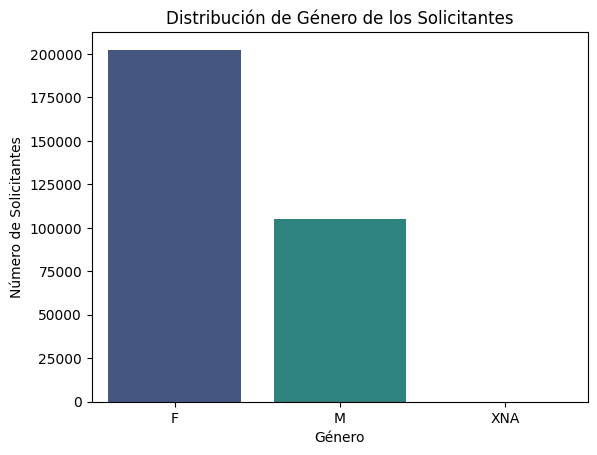

In [17]:
# Contar el número de solicitantes por género
distribucion_genero = df['CODE_GENDER'].value_counts()

# Imprimir la distribución
print(distribucion_genero)

# Visualizar la distribución
sns.barplot(x=distribucion_genero.index, y=distribucion_genero.values, palette="viridis")
plt.title('Distribución de Género de los Solicitantes')
plt.xlabel('Género')
plt.ylabel('Número de Solicitantes')
plt.show()

## Solicitantes poseen un automóvil o una propiedad

In [18]:
# Contar cuántos solicitantes poseen un automóvil
autos = df['FLAG_OWN_CAR'].value_counts()
print("Número de solicitantes que poseen un automóvil:")
print(autos)

# Contar cuántos solicitantes poseen una propiedad
propiedad = df['FLAG_OWN_REALTY'].value_counts()
print("\nNúmero de solicitantes que poseen una propiedad:")
print(propiedad)

Número de solicitantes que poseen un automóvil:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Número de solicitantes que poseen una propiedad:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


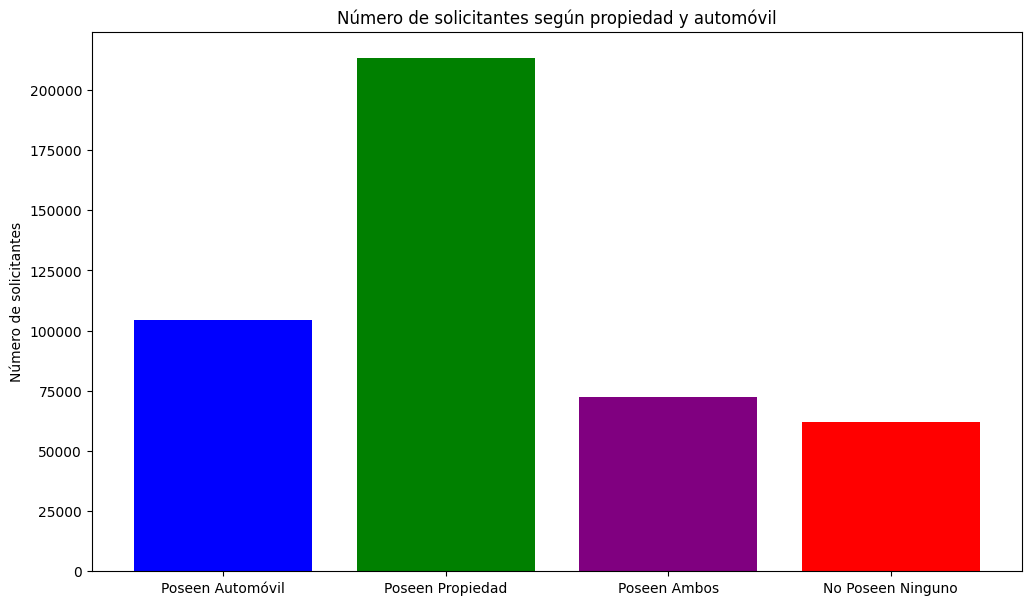

In [20]:
# Calcular el número de solicitantes que poseen un automóvil y/o una propiedad
autos = df[df['FLAG_OWN_CAR'] == 'Y'].shape[0]
propiedad = df[df['FLAG_OWN_REALTY'] == 'Y'].shape[0]
ambos = df[(df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'Y')].shape[0]
ninguno = df[(df['FLAG_OWN_CAR'] == 'N') & (df['FLAG_OWN_REALTY'] == 'N')].shape[0]

# Crear una lista con los valores y las etiquetas
valores = [autos, propiedad, ambos, ninguno]
etiquetas = ['Poseen Automóvil', 'Poseen Propiedad', 'Poseen Ambos', 'No Poseen Ninguno']

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
plt.bar(etiquetas, valores, color=['blue', 'green', 'purple', 'red'])
plt.title('Número de solicitantes según propiedad y automóvil')
plt.ylabel('Número de solicitantes')
plt.show()

## Distribución de los solicitantes según el tipo de ingresos, educación, estado civil y tipo de vivienda

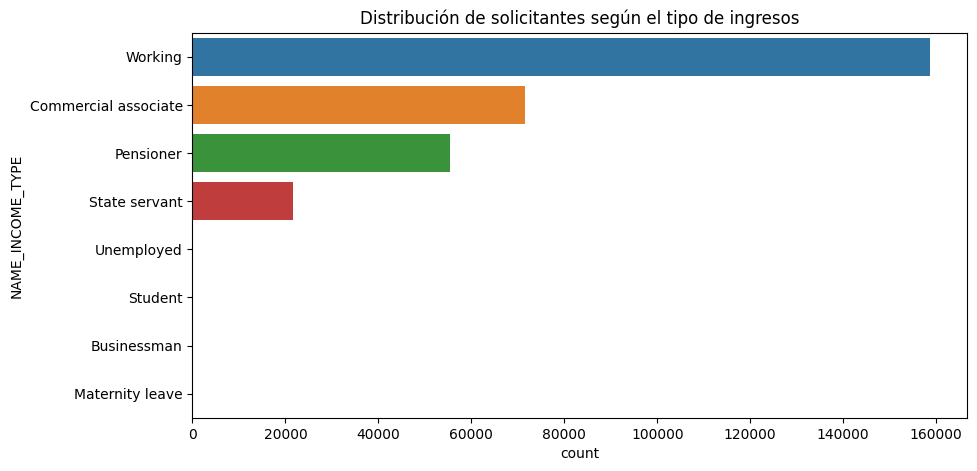

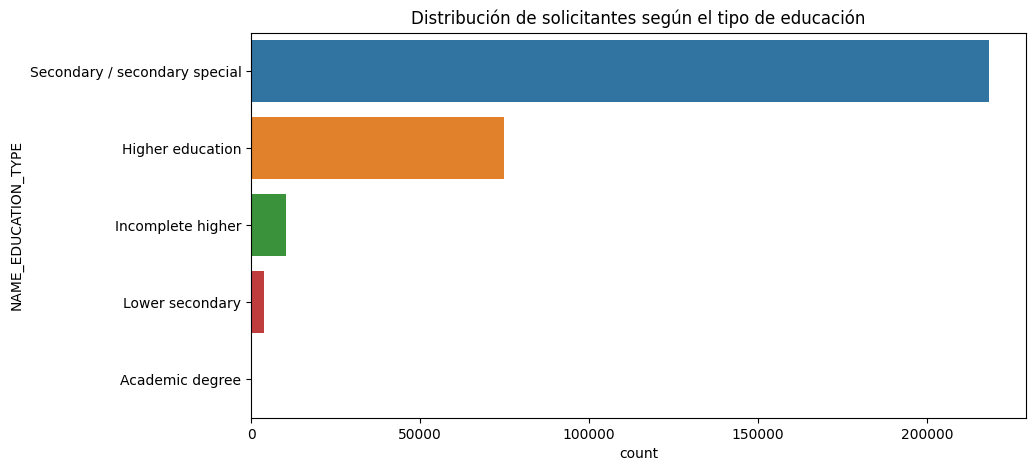

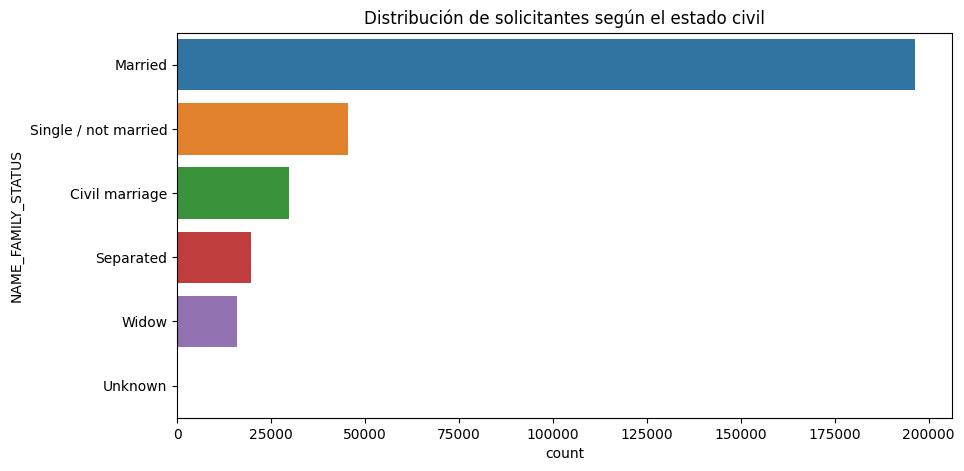

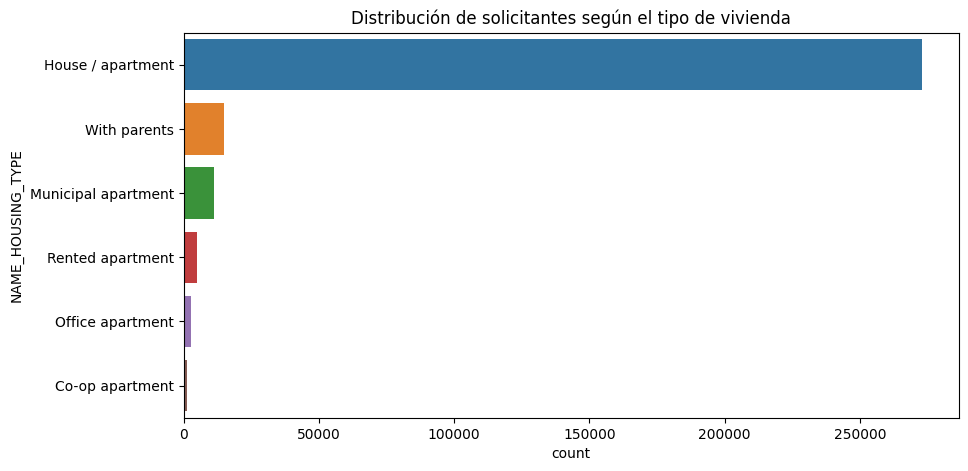

In [21]:
# Distribución según el tipo de ingresos
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_INCOME_TYPE', order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de ingresos')
plt.show()

# Distribución según el tipo de educación
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_EDUCATION_TYPE', order=df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de educación')
plt.show()

# Distribución según el estado civil
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_FAMILY_STATUS', order=df['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Distribución de solicitantes según el estado civil')
plt.show()

# Distribución según el tipo de vivienda
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_HOUSING_TYPE', order=df['NAME_HOUSING_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de vivienda')
plt.show()


In [ ]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
